In [194]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set()



In [195]:
data_set = pd.read_csv("LiIonDatabase.csv")
data_set

,ID,composition,source,temperature,target,log_target,family,ChemicalFamily
0,1,Li2Ti0.75Ta0.25O3.125,10.1016/j.fusengdes.2010.04.003,300.00,9.000000e-05,-4.045757,Rocksalt,Oxides
1,2,Li2OHBr,10.1002/aenm.201700971,22.06,5.400000e-07,-6.267606,Anti-Perovskite,Oxides and Other Anions
2,3,Li2.4OH0.6Cl,10.1002/aenm.201700971,26.00,8.900000e-08,-7.050610,Anti-Perovskite,Oxides and Other Anions
3,4,Li2.1OH0.9Cl,10.1002/aenm.201700971,26.00,8.050000e-08,-7.094204,Anti-Perovskite,Oxides and Other Anions
4,5,Li2OHCl,10.1002/aenm.201700971,26.00,7.110000e-08,-7.148130,Anti-Perovskite,Oxides and Other Anions
...,...,...,...,...,...,...,...,...
815,2027,Li3.6Ge0.4P0.6S4,10.1149/1.1379028,25.00,2.213560e-04,-3.654909,Thio-LISICON,Sulphides
816,2028,Li3.35Ge0.35P0.65S4,10.1149/1.1379028,25.00,1.830655e-03,-2.737394,Thio-LISICON,Sulphides
817,2029,Li6NiCl8,10.1002/zaac.19875531020,25.00,2.690000e-10,-9.569675,Rocksalt,Halides
818,2030,Li6CoCl8,10.1002/zaac.19875531020,25.00,1.510000e-06,-5.821821,Rocksalt,Halides


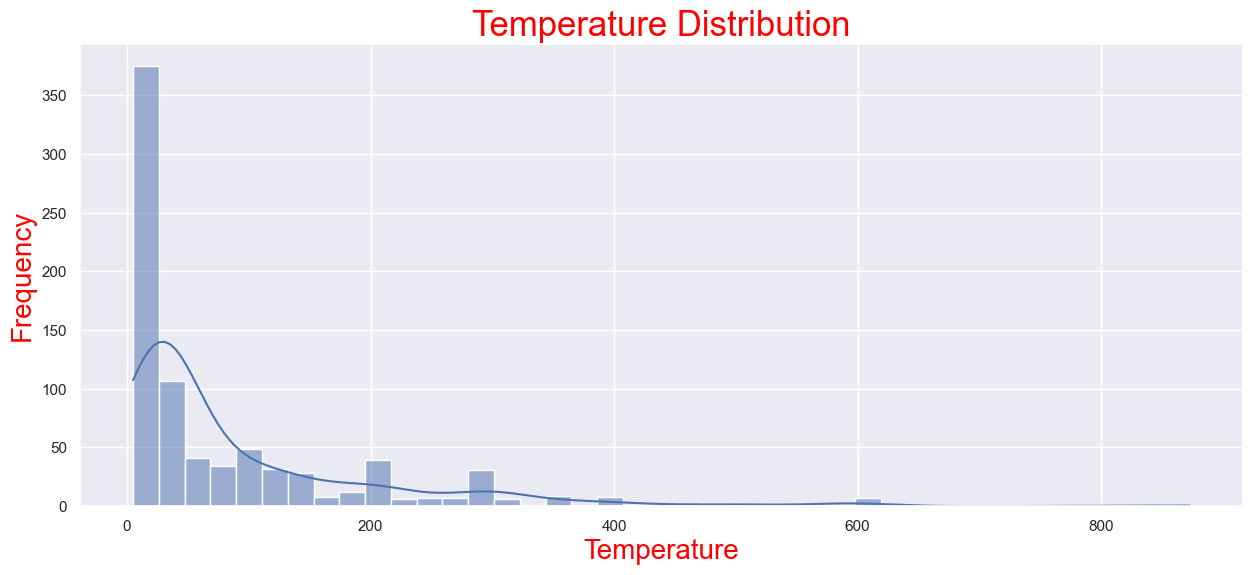

In [220]:
# Temperature Distribution of Material Conductivity
plt.figure(figsize=(15, 6))
sns.histplot(data_set['temperature'], kde=True)
plt.title('Temperature Distribution', fontsize=25, color='red')
plt.xlabel('Temperature', fontsize=20, color='red')
plt.ylabel('Frequency', fontsize=20, color='red')
plt.grid(True)
plt.show()

The temperature distribution appears to be more denser at lower temperatures and gradually  disappear as temperatures go higher. This indicate most of the materials studied showed measurable conductivity at lower temperatures.

In [196]:
#checking dataset for more information necessary for analysis.
data_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              820 non-null    int64  
 1   composition     820 non-null    object 
 2   source          820 non-null    object 
 3   temperature     820 non-null    float64
 4   target          820 non-null    float64
 5   log_target      820 non-null    float64
 6   family          820 non-null    object 
 7   ChemicalFamily  499 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 51.4+ KB


There several compositions with missing chemicalfamily names. Some columns need to be filtered out to make room for analysis on the important columns.

Exploratory data analysis
Questions we intended to answer with this analysis:

1. Which classifications of materials are most studied for their applications as electrolytes.
2 Which of the materials show room temperature conductivity?
3. Which of family showed the high conductivity within the room temperature range.
4. understanding the conductivity distributions based on the various materials family.
5. other trends and comparative analysis based on the various family.


In [197]:
#cleaning up data for further analysis
#dropping unnecessary colums for better prediction structure and material properties
data_new = data_set[['ID', 'composition', 'temperature', 'target', 'log_target', 'family']]
data_new.head(200)

,ID,composition,temperature,target,log_target,family
0,1,Li2Ti0.75Ta0.25O3.125,300.00,9.000000e-05,-4.045757,Rocksalt
1,2,Li2OHBr,22.06,5.400000e-07,-6.267606,Anti-Perovskite
2,3,Li2.4OH0.6Cl,26.00,8.900000e-08,-7.050610,Anti-Perovskite
3,4,Li2.1OH0.9Cl,26.00,8.050000e-08,-7.094204,Anti-Perovskite
4,5,Li2OHCl,26.00,7.110000e-08,-7.148130,Anti-Perovskite
...,...,...,...,...,...,...
195,237,Li5La3Ta2O12,60.00,1.520000e-05,-4.818156,Garnet
196,238,Li5La3Ta2O12,50.00,8.390000e-06,-5.076238,Garnet
197,239,Li5La3Ta2O12,25.00,1.510000e-06,-5.821023,Garnet
198,240,"""(Li2O)16.6 (SiO2)83.4""",179.00,2.770000e-06,-5.557520,Glass


In [198]:
# obtaining general description of all materials in the dataset
data_new.describe()


,ID,temperature,target,log_target
count,820.000000,820.000000,8.200000e+02,820.000000
mean,534.995122,93.290073,3.434390e-03,-4.593376
std,395.847864,119.450770,1.576076e-02,2.189553
min,1.000000,5.000000,5.000000e-16,-15.301030
25%,246.750000,25.000000,1.517500e-06,-5.818873
50%,494.000000,30.000000,7.010000e-05,-4.154282
75%,737.250000,124.240000,9.002500e-04,-3.045637
max,2031.000000,873.000000,2.750000e-01,-0.560667


In [199]:
# Getting insights into the temperature correlations of conductivities and practical applications
temp_correlations= data_new['temperature'].corr(data_new['target'])
temp_correlations

0.4284257656034521

The temperature correlation coefficient in the materials studied is 0.428. An indication of highly conductive materials studied for this dataset.

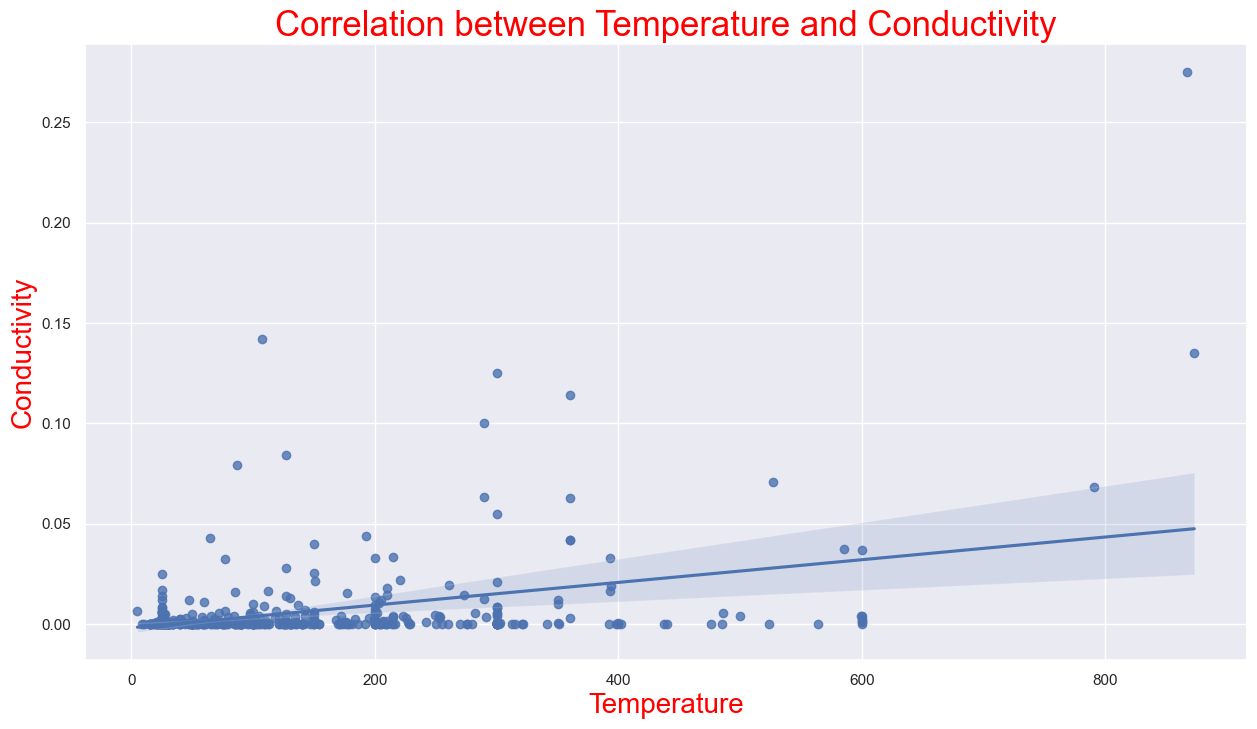

In [200]:
#  Regression analysis showing temperature correlations 
plt.figure(figsize=(15, 8))
sns.regplot(x='temperature', y='target', data=data_new)
plt.title('Correlation between Temperature and Conductivity', fontsize=25, color='red')
plt.xlabel('Temperature', fontsize=20, color='red')
plt.ylabel('Conductivity', fontsize=20, color='red')
plt.grid(True)
plt.show()

We can observe quite some number of materials showing conductivities at very low temperatures, usually below 200 C, while a few others goes beyound the range for solid electrolyte applications

In [201]:
# checking the most studied materials per family in this dataset
material_classifications = data_new["family"].value_counts()[:7]
material_classifications


family
NASICON         217
Garnet          119
Perovskite      119
Glass           102
Thio-LISICON     62
LISICON          43
Other            28
Name: count, dtype: int64

We see a grouping of all material composition into their various chemical family structures in descending order. The most studied materials belong to the NASICON, followed  by Garnet, and Perovskite families.

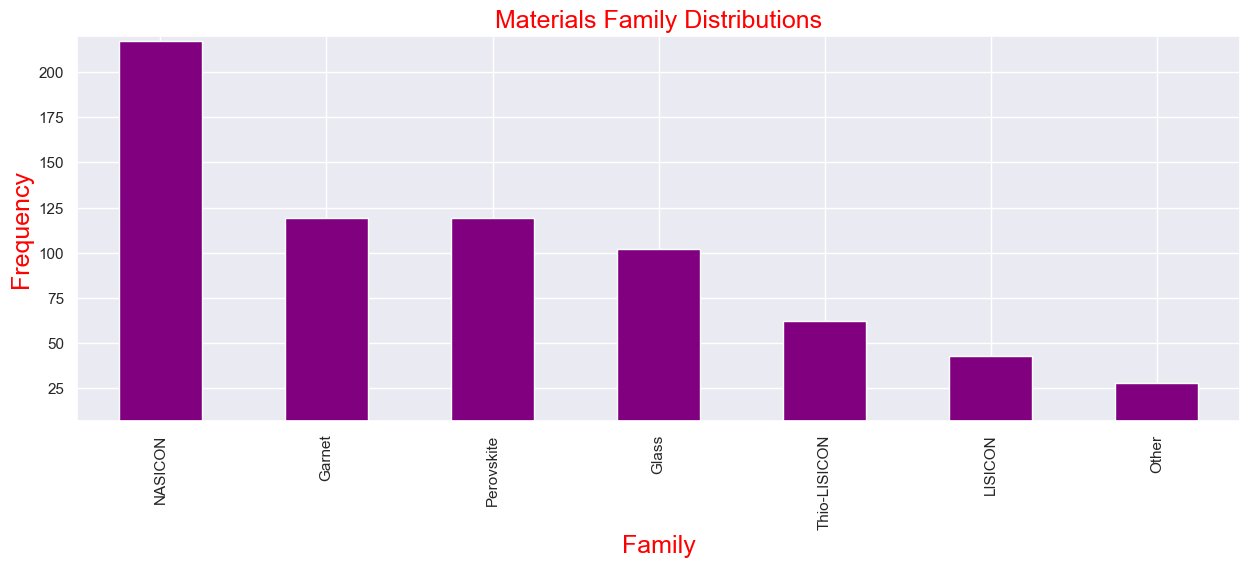

In [213]:
# Make comparison bar charts of Top 7 family structure
plt.figure(figsize=(15, 5))
material_classifications.plot(kind='bar', color='purple')
plt.ylim(7,220)
plt.title('Materials Family Distributions', fontsize=18, color='red')
plt.xlabel('Family', fontsize=18, color='red')
plt.ylabel('Frequency', fontsize=18, color='red')
plt.grid(True)
plt.show()

In [203]:
# Isolating different materials with room temperature conductivity targets
# Most battery materials are required to show high conductivity at room temperatures.
rmtemp = data_new[(data_new["temperature"] >= 15) & (data_new["temperature"] <= 37)]
rmtemp

,ID,composition,temperature,target,log_target,family
1,2,Li2OHBr,22.06,5.400000e-07,-6.267606,Anti-Perovskite
2,3,Li2.4OH0.6Cl,26.00,8.900000e-08,-7.050610,Anti-Perovskite
3,4,Li2.1OH0.9Cl,26.00,8.050000e-08,-7.094204,Anti-Perovskite
4,5,Li2OHCl,26.00,7.110000e-08,-7.148130,Anti-Perovskite
5,6,Li2.7OH0.3Cl,26.00,7.300000e-09,-8.136677,Anti-Perovskite
...,...,...,...,...,...,...
815,2027,Li3.6Ge0.4P0.6S4,25.00,2.213560e-04,-3.654909,Thio-LISICON
816,2028,Li3.35Ge0.35P0.65S4,25.00,1.830655e-03,-2.737394,Thio-LISICON
817,2029,Li6NiCl8,25.00,2.690000e-10,-9.569675,Rocksalt
818,2030,Li6CoCl8,25.00,1.510000e-06,-5.821821,Rocksalt


In [204]:

new_dataset2 = rmtemp[['composition', 'temperature', 'target', 'log_target', 'family']].copy()
new_dataset2

,composition,temperature,target,log_target,family
1,Li2OHBr,22.06,5.400000e-07,-6.267606,Anti-Perovskite
2,Li2.4OH0.6Cl,26.00,8.900000e-08,-7.050610,Anti-Perovskite
3,Li2.1OH0.9Cl,26.00,8.050000e-08,-7.094204,Anti-Perovskite
4,Li2OHCl,26.00,7.110000e-08,-7.148130,Anti-Perovskite
5,Li2.7OH0.3Cl,26.00,7.300000e-09,-8.136677,Anti-Perovskite
...,...,...,...,...,...
815,Li3.6Ge0.4P0.6S4,25.00,2.213560e-04,-3.654909,Thio-LISICON
816,Li3.35Ge0.35P0.65S4,25.00,1.830655e-03,-2.737394,Thio-LISICON
817,Li6NiCl8,25.00,2.690000e-10,-9.569675,Rocksalt
818,Li6CoCl8,25.00,1.510000e-06,-5.821821,Rocksalt


In [205]:
# Sort the DataFrame by the log_target column in descending order
sorted_df = new_dataset2.sort_values(by='log_target', ascending=False)

# Select the top 10 rows
top_10_log_targets = sorted_df.head(7)
top_10_log_targets



,composition,temperature,target,log_target,family
26,Li9.54Si1.74P1.44S11.7Cl0.3,24.85,0.02500,-1.602060,Thio-LISICON
581,"""(Li2S)70 (P2S5)30""",25.00,0.01700,-1.769551,Glass-Ceramic
443,Li6.25PS5.25Cl0.75,25.00,0.01400,-1.853872,Argyrodite
560,Li10GeP2S12,25.00,0.01200,-1.920819,Thio-LISICON
641,Li10Ge0.95Si0.05P2S12,25.00,0.00860,-2.065502,Thio-LISICON
480,Li5PS4(BH4)2,25.00,0.00796,-2.099087,Argyrodite
608,Li10.35Si1.35P1.65S12,25.00,0.00650,-2.187087,Thio-LISICON


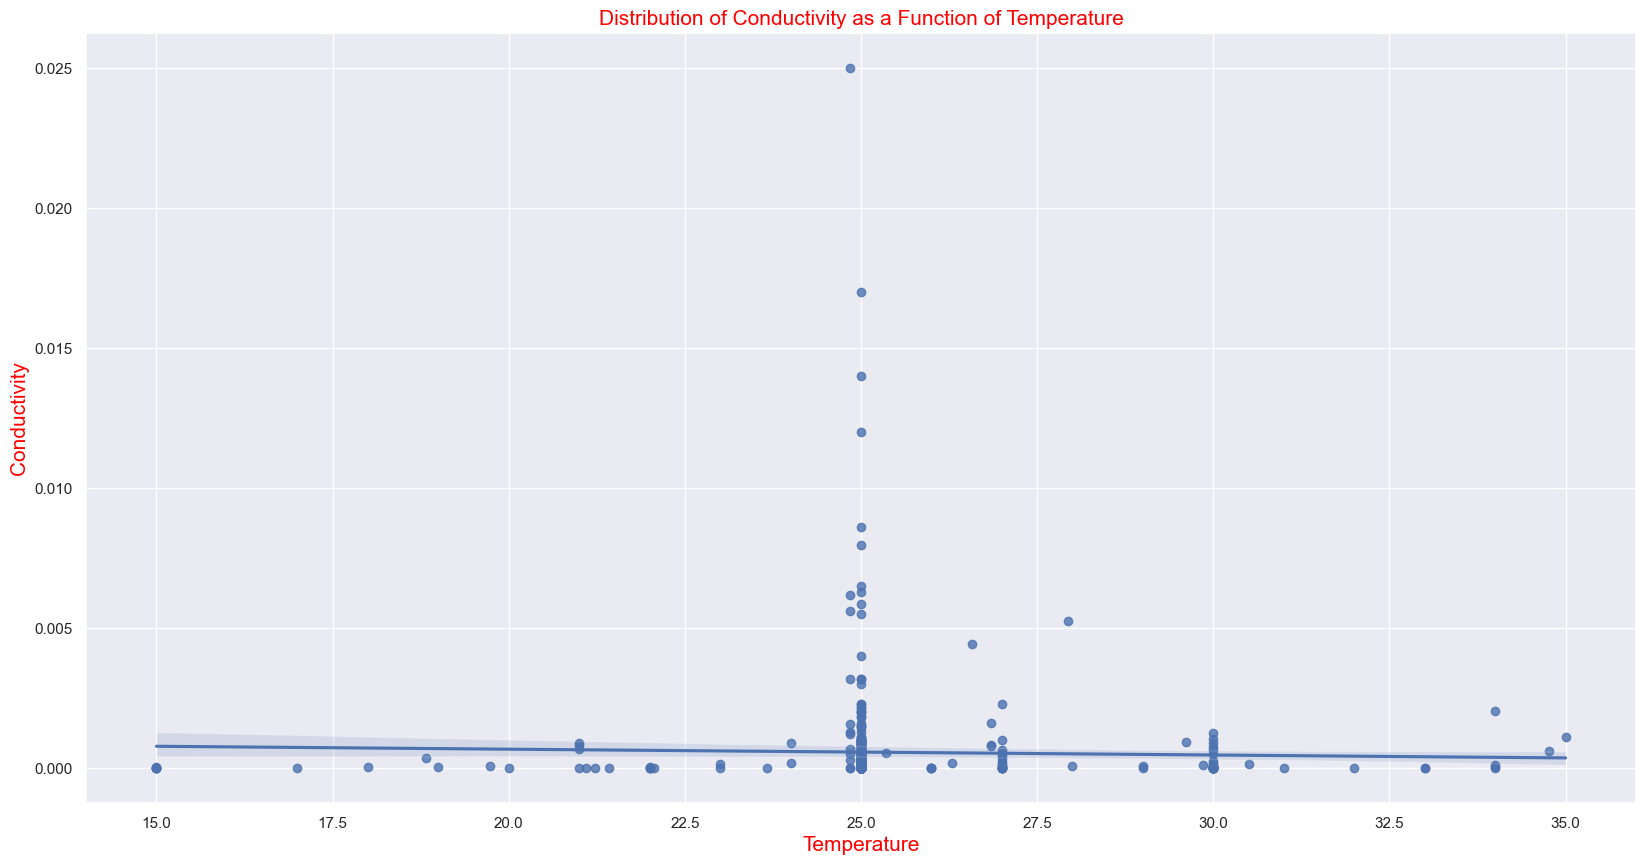

In [206]:
# Figuring out the distribution of conductivity as a function of temperature
plt.figure(figsize=(20, 10))
sns.regplot(x='temperature', y='target', data=new_dataset2)
plt.title('Distribution of Conductivity as a Function of Temperature', fontsize=15, color='red')
plt.xlabel('Temperature', fontsize=15, color='red')
plt.ylabel('Conductivity', fontsize=15, color='red')
plt.grid(True)
plt.show()

It is observed that most of the material classes show measureable conductivities at room temperature (25)

In [207]:
# Tracking outliers in terms of conductivity
conductivity_outliers = new_dataset2[new_dataset2['target'] > new_dataset2['target'].quantile(0.95)]
conductivity_outliers


,composition,temperature,target,log_target,family
19,Li1.3Al0.3Ti1.7(PO4)3,24.85,0.006200,-2.207608,NASICON
26,Li9.54Si1.74P1.44S11.7Cl0.3,24.85,0.025000,-1.602060,Thio-LISICON
28,Li7P3S11,24.85,0.003200,-2.494850,Thio-LISICON
29,Li1.4Al0.4Ti1.6(PO4)3,24.85,0.005630,-2.249492,NASICON
118,"""(Li2S)0.7 (P2S5)0.3""",25.00,0.003200,-2.494850,Glass
368,Li1.3Al0.3Ti1.7(PO4)3,25.00,0.002160,-2.665546,NASICON
411,Li1.3Al0.3Ti1.7(PO4)3,25.00,0.003000,-2.522879,NASICON
443,Li6.25PS5.25Cl0.75,25.00,0.014000,-1.853872,Argyrodite
480,Li5PS4(BH4)2,25.00,0.007960,-2.099087,Argyrodite
559,Li10SnP2S12,25.00,0.004000,-2.397940,Thio-LISICON


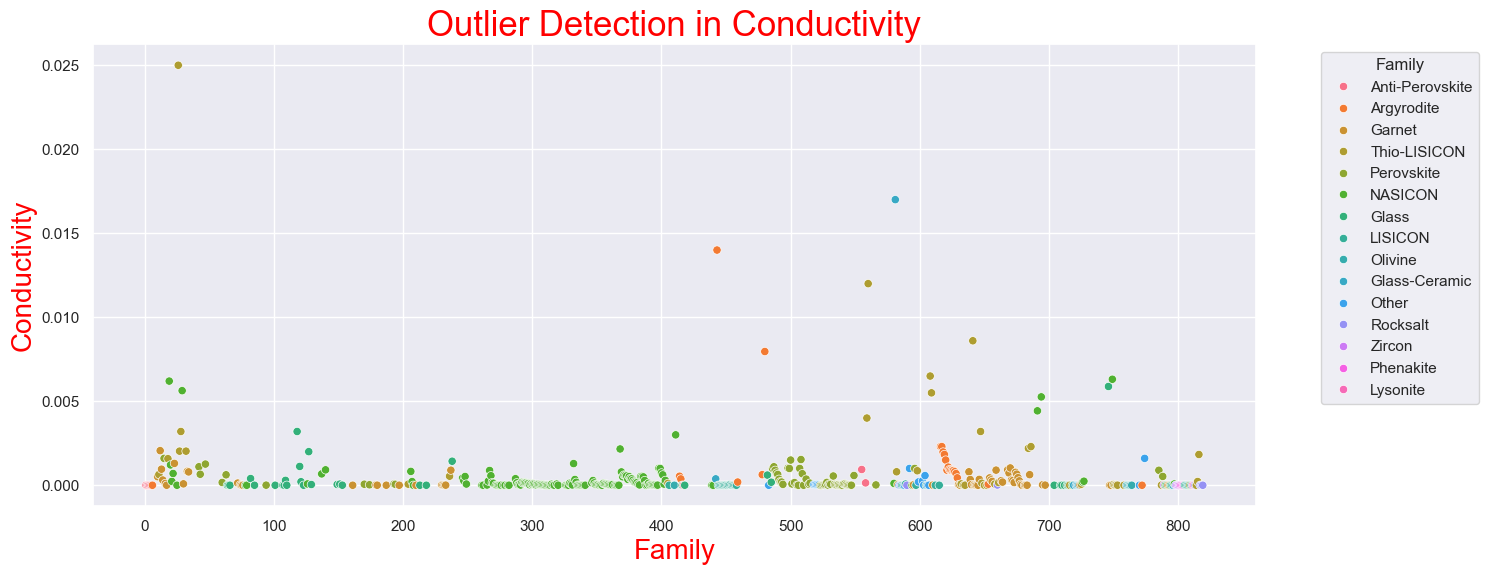

In [214]:
#  Outliers presented with Scatter Plot
plt.figure(figsize=(15, 6))
sns.scatterplot(x=new_dataset2.index, y='target', data=new_dataset2, hue='family')
plt.title('Outlier Detection in Conductivity', fontsize=25, color='red')
plt.xlabel('Family', fontsize=20, color='red')
plt.ylabel('Conductivity', fontsize=20, color='red')
plt.legend(title='Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [209]:
# Conductivity Distribution
conductivity_stats = top_10_log_targets['target'].describe()
log_conductivity_stats = top_10_log_targets['log_target'].describe()
print("\n Conductivity Distribution:")
print(conductivity_stats)
print("\nLog Conductivity Distribution:")
print(log_conductivity_stats)


 Conductivity Distribution:
count    7.000000
mean     0.013009
std      0.006442
min      0.006500
25%      0.008280
50%      0.012000
75%      0.015500
max      0.025000
Name: target, dtype: float64

Log Conductivity Distribution:
count    7.000000
mean    -1.928282
std      0.205017
min     -2.187087
25%     -2.082294
50%     -1.920819
75%     -1.811712
max     -1.602060
Name: log_target, dtype: float64


In [210]:
# Comparative Analysis
family_conductivity_summary = new_dataset2.groupby('family')['target'].describe()
family_conductivity_summary

,count,mean,std,min,25%,50%,75%,max
family,,,,,,,,
Anti-Perovskite,8.0,1.351060e-04,3.281327e-04,7.300000e-09,7.815000e-08,3.145000e-07,3.604500e-05,9.380000e-04
Argyrodite,23.0,1.789287e-03,3.112860e-03,1.000000e-10,4.890000e-04,8.740000e-04,1.665000e-03,1.400000e-02
Garnet,67.0,2.752318e-04,4.041243e-04,8.700000e-09,5.100000e-06,4.000000e-05,3.930000e-04,2.060000e-03
Glass,36.0,4.300658e-04,1.148288e-03,1.300000e-09,3.820000e-08,5.970000e-07,1.882500e-04,5.880000e-03
Glass-Ceramic,7.0,2.487384e-03,6.400978e-03,1.110000e-08,4.590000e-06,1.000000e-05,1.962500e-04,1.700000e-02
LISICON,28.0,5.406307e-06,1.443995e-05,9.200000e-14,1.063750e-12,5.770000e-07,1.930000e-06,7.000000e-05
Lysonite,2.0,2.971750e-10,4.127029e-10,5.350000e-12,1.512625e-10,2.971750e-10,4.430875e-10,5.890000e-10
NASICON,154.0,3.800905e-04,1.033995e-03,1.000000e-10,2.825000e-06,5.940000e-05,2.772500e-04,6.309000e-03
Olivine,6.0,7.315517e-10,6.063461e-10,6.310000e-12,2.092500e-10,8.005000e-10,1.220000e-09,1.410000e-09


In [211]:
#  Comparative analysis of conductivities based on the various families
figure, ax1 = plt.subplots(figsize=(15.8, 10.91), dpi=600) 

mean = np.mean(rmtemp["log_target"])
med = np.median(rmtemp["log_target"])

# Fit histogram to data
n,bins,patches = ax1.hist(rmtemp["log_target"], bins=50, color='purple', density=False, zorder=4, rwidth=1.01)
ax1.set_ylabel("Count", fontsize=20, color='red')
ax1.set_xlabel("Log$_{10}$($\sigma$)", fontsize=20, color='red')
ax1.set_title("Distribution of Conductivities Based on Family", fontsize=25, color='red')
plt.grid(True)
plt.tight_layout()

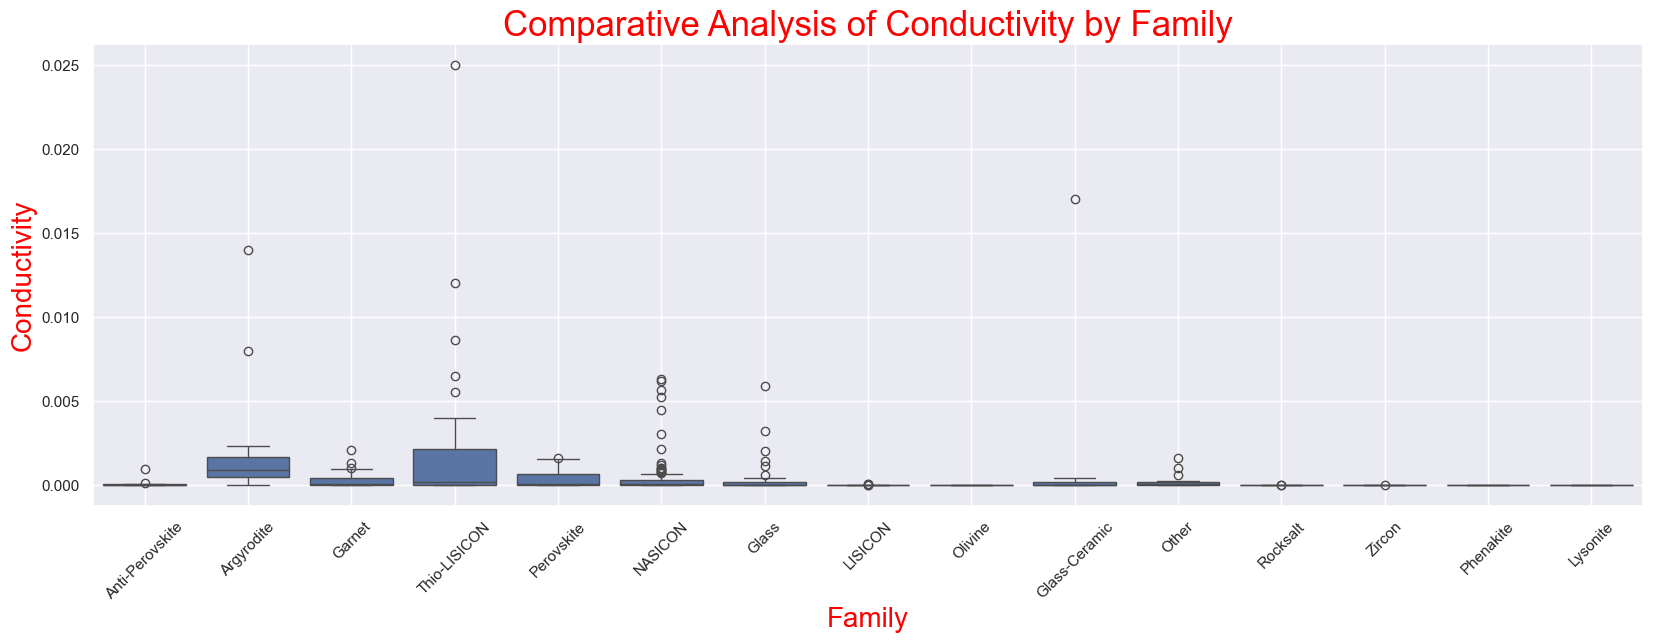

In [212]:
# Comparative Analysis of conductivities across all studied families using Box Plot 
plt.figure(figsize=(20, 6))
sns.boxplot(x='family', y='target', data=new_dataset2)
plt.title('Comparative Analysis of Conductivity by Family', fontsize=25, color='red')
plt.xlabel('Family', fontsize=20, color='red')
plt.ylabel('Conductivity', fontsize=20, color='red')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

We observe that the best performing room temperature materials belong to the thio-lisicon, followed by argyrodite and perovskites respectively.